In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#raw_data = pd.read_csv('/content/drive/MyDrive/Google Colab Notebooks/Mini Sem 8/dataset/large sample/reliance_2years_60min.csv')
raw_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/RELIANCE.csv')
# raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFC.csv')
# raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/TCS.csv')
# raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/HDFCBANK.csv')
# raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/LT.csv')
# raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/INFY.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/KOTAKBANK.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ITC.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/SBIN.csv')
#raw_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Final_csv/ICICIBANK.csv')

In [4]:
time = []
for i in raw_data['Datetime']:
    date_list = i.split("+")
    time.append(date_list[0])

raw_data['Datetime']=time

In [5]:
# rename columns according to our older convention
raw_data.rename(
    {'Datetime':'time',
     'Open': 'open',
    'High': 'high',
    'Low' : 'low',
    'Close':'close',
    'Volume' : 'volume'},
    axis=1,
    inplace=True)

In [6]:
print(raw_data.shape)
raw_data.head()

(6404, 7)


,time,open,high,low,close,volume,Trading_code
0,2021-04-26 09:15:00,1920.00,1930.00,1912.00,1926.85,1061804,RELIANCE
1,2021-04-26 09:30:00,1927.00,1936.10,1925.05,1935.05,652372,RELIANCE
2,2021-04-26 09:45:00,1935.20,1949.75,1935.05,1949.25,707257,RELIANCE
3,2021-04-26 10:00:00,1949.15,1961.60,1949.10,1955.00,915519,RELIANCE
4,2021-04-26 10:15:00,1955.05,1958.20,1947.60,1950.95,609119,RELIANCE


In [7]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

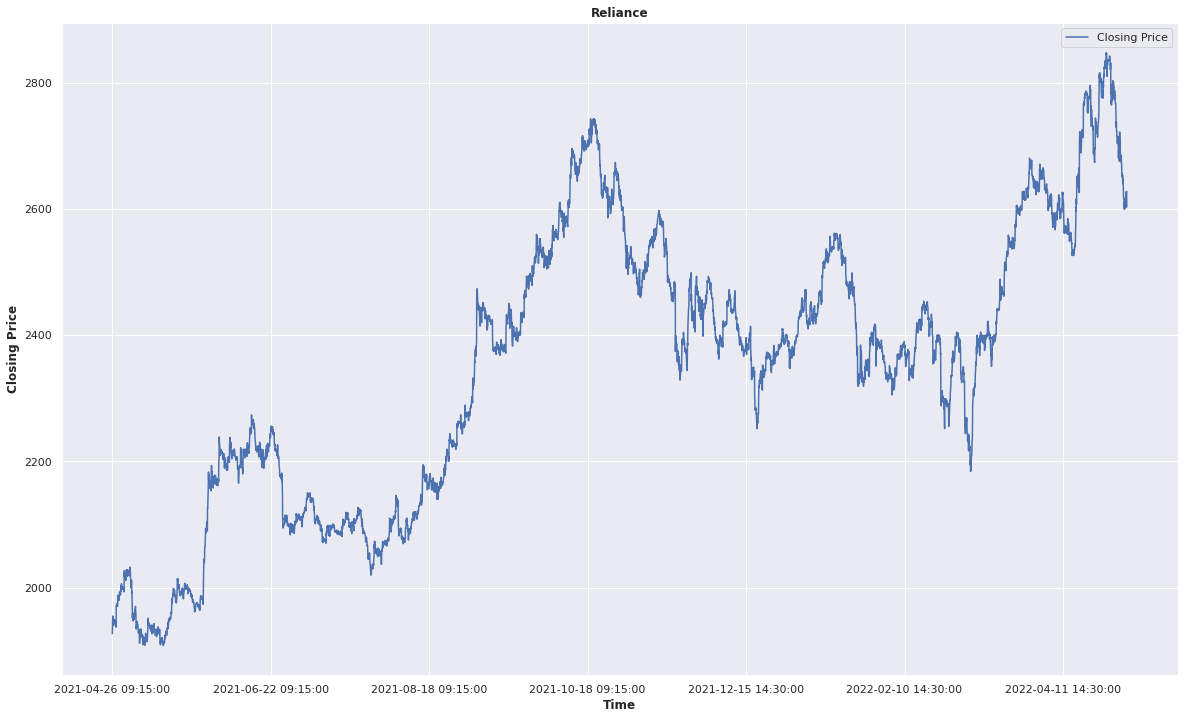

In [8]:

close_ds.plot(x='time', y='close', figsize=(20, 12))
plt.ylabel('Closing Price', fontweight='bold') 
plt.xlabel('Time', fontweight='bold') 
plt.title("Reliance", fontweight='bold')
plt.legend(['Closing Price'])

In [9]:
# ema and vwap

from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier 
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)  
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):
  
  time_format = "%Y-%m-%d %H:%M:%S"
  
  sum_pv = 0
  sum_volume = 0
  
  vwap = []
  
  previous_day = datetime.strptime(df["time"][0], time_format).day

  for i in range(len(df)):
    
    current_day = datetime.strptime(df["time"][i], time_format).day

    if(current_day!=previous_day):
      sum_pv = 0
      sum_volume = 0

    previous_day = current_day

    sum_pv += ((df["high"][i] + df["low"][i] + df["close"][i])/3) * df["volume"][i]
    sum_volume += df["volume"][i]
    vwap.append(sum_pv/sum_volume)
  return vwap

In [10]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 6404
 Days 10 
 Length of prices 6404
 Length of EMA list 6394
len ema = 6394
len vwap = 6404


In [11]:
# make all ema, vwap, prices lists of equal length 
price = price[-len(ema):]
vwap = vwap[-len(ema):]

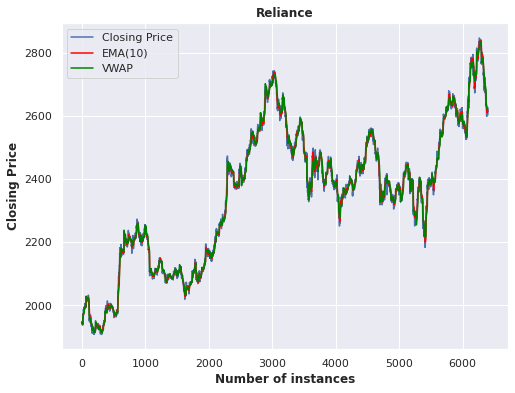

In [12]:
plt.figure(figsize=(8,6))
plt.title("Reliance", fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold') 
plt.xlabel('Number of instances', fontweight='bold') 
plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend(['Closing Price','EMA(10)','VWAP'])
plt.show()

In [13]:

# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [14]:

ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[1944.36681818 1941.6297111  1946.85      ]
 [1944.37285124 1941.71356597 1944.4       ]
 [1944.04142374 1941.75981017 1942.55      ]
 ...
 [2613.05616268 2620.0202848  2603.        ]
 [2615.34593347 2619.75506223 2625.649902  ]
 [2617.64667284 2620.33009701 2628.        ]]


In [15]:
n_steps = 3 
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(6392, 3, 3) (6392,)
[[1944.36681818 1941.6297111  1946.85      ]
 [1944.37285124 1941.71356597 1944.4       ]
 [1944.04142374 1941.75981017 1942.55      ]] 1942.55


In [16]:
# train_test_split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(4474, 3, 3)
(4474,)
(1918, 3, 3)
(1918,)


In [17]:
X_test

array([[[2482.96902622, 2489.77601888, 2501.5       ],
        [2488.056476  , 2492.9642637 , 2510.95      ],
        [2492.95529854, 2495.59248887, 2515.        ]],

       [[2488.056476  , 2492.9642637 , 2510.95      ],
        [2492.95529854, 2495.59248887, 2515.        ],
        [2497.14524426, 2498.71032134, 2516.        ]],

       [[2492.95529854, 2495.59248887, 2515.        ],
        [2497.14524426, 2498.71032134, 2516.        ],
        [2500.13701803, 2499.68281641, 2513.6       ]],

       ...,

       [[2616.46661339, 2621.0875528 , 2622.        ],
        [2615.2908655 , 2620.7243352 , 2610.        ],
        [2613.05616268, 2620.0202848 , 2603.        ]],

       [[2615.2908655 , 2620.7243352 , 2610.        ],
        [2613.05616268, 2620.0202848 , 2603.        ],
        [2615.34593347, 2619.75506223, 2625.649902  ]],

       [[2613.05616268, 2620.0202848 , 2603.        ],
        [2615.34593347, 2619.75506223, 2625.649902  ],
        [2617.64667284, 2620.33009701, 262

In [18]:
print(X_test)

[[[2482.96902622 2489.77601888 2501.5       ]
  [2488.056476   2492.9642637  2510.95      ]
  [2492.95529854 2495.59248887 2515.        ]]

 [[2488.056476   2492.9642637  2510.95      ]
  [2492.95529854 2495.59248887 2515.        ]
  [2497.14524426 2498.71032134 2516.        ]]

 [[2492.95529854 2495.59248887 2515.        ]
  [2497.14524426 2498.71032134 2516.        ]
  [2500.13701803 2499.68281641 2513.6       ]]

 ...

 [[2616.46661339 2621.0875528  2622.        ]
  [2615.2908655  2620.7243352  2610.        ]
  [2613.05616268 2620.0202848  2603.        ]]

 [[2615.2908655  2620.7243352  2610.        ]
  [2613.05616268 2620.0202848  2603.        ]
  [2615.34593347 2619.75506223 2625.649902  ]]

 [[2613.05616268 2620.0202848  2603.        ]
  [2615.34593347 2619.75506223 2625.649902  ]
  [2617.64667284 2620.33009701 2628.        ]]]


In [19]:
print(y_test)

[2515.       2516.       2513.6      ... 2603.       2625.649902
 2628.      ]


In [20]:
# flattening input for model feeding 

# n_input = X_train.shape[1] * X_train.shape[2]
# X_train_flattened = X_train.reshape((X_train.shape[0], n_input))
# X_test_flattened = X_test.reshape((X_test.shape[0], n_input))
# print(X_train_flattened.shape)
# print(X_test_flattened.shape)

In [21]:
# Model training

from tensorflow import keras 
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Bidirectional

# Vanilla LSTM

model_lstm_vanilla = Sequential()
model_lstm_vanilla.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_vanilla.add(Dense(1))
model_lstm_vanilla.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.0003))
model_lstm_vanilla.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [22]:
# Stacked LSTM

model_lstm_stacked = Sequential()
model_lstm_stacked.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_stacked.add(LSTM(50, activation='relu'))
model_lstm_stacked.add(Dense(1))
model_lstm_stacked.compile(optimizer=keras.optimizers.Adam(lr=0.0003), loss='mse')
model_lstm_stacked.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 3, 50)             10800     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 31,051
Trainable params: 31,051
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [23]:
# Bidirectional LSTM

model_lstm_bidirectional = Sequential()
model_lstm_bidirectional.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_bidirectional.add(Dense(1))
model_lstm_bidirectional.compile(optimizer=keras.optimizers.Adam(lr=0.0003), loss='mse')
model_lstm_bidirectional.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 100)              21600     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,701
Trainable params: 21,701
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
lstm_vanilla_history = model_lstm_vanilla.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
140/140 - 5s - loss: 5367904.0000 - val_loss: 4351054.5000 - 5s/epoch - 35ms/step
Epoch 2/50
140/140 - 1s - loss: 2622142.5000 - val_loss: 2016225.6250 - 1s/epoch - 8ms/step
Epoch 3/50
140/140 - 1s - loss: 1051401.6250 - val_loss: 629488.8750 - 1s/epoch - 8ms/step
Epoch 4/50
140/140 - 1s - loss: 255477.6094 - val_loss: 35573.5547 - 1s/epoch - 8ms/step
Epoch 5/50
140/140 - 1s - loss: 3919.0049 - val_loss: 138.9661 - 1s/epoch - 7ms/step
Epoch 6/50
140/140 - 1s - loss: 85.9235 - val_loss: 138.6817 - 1s/epoch - 7ms/step
Epoch 7/50
140/140 - 1s - loss: 84.7770 - val_loss: 138.4077 - 1s/epoch - 8ms/step
Epoch 8/50
140/140 - 1s - loss: 83.9551 - val_loss: 138.3898 - 1s/epoch - 8ms/step
Epoch 9/50
140/140 - 1s - loss: 83.7040 - val_loss: 138.3608 - 1s/epoch - 8ms/step
Epoch 10/50
140/140 - 1s - loss: 83.5341 - val_loss: 138.0100 - 1s/epoch - 8ms/step
Epoch 11/50
140/140 - 1s - loss: 83.3825 - val_loss: 136.8865 - 1s/epoch - 8ms/step
Epoch 12/50
140/140 - 1s - loss: 83.2127 - val_los

In [25]:
lstm_stacked_history = model_lstm_stacked.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
140/140 - 4s - loss: 3255821.5000 - val_loss: 1590438.6250 - 4s/epoch - 29ms/step
Epoch 2/50
140/140 - 2s - loss: 270437.7500 - val_loss: 172.7547 - 2s/epoch - 14ms/step
Epoch 3/50
140/140 - 2s - loss: 89.4652 - val_loss: 142.3590 - 2s/epoch - 14ms/step
Epoch 4/50
140/140 - 2s - loss: 82.2595 - val_loss: 114.0843 - 2s/epoch - 13ms/step
Epoch 5/50
140/140 - 2s - loss: 66.0417 - val_loss: 92.7562 - 2s/epoch - 14ms/step
Epoch 6/50
140/140 - 2s - loss: 63.6275 - val_loss: 100.8361 - 2s/epoch - 13ms/step
Epoch 7/50
140/140 - 2s - loss: 59.1861 - val_loss: 133.1668 - 2s/epoch - 14ms/step
Epoch 8/50
140/140 - 2s - loss: 57.7498 - val_loss: 86.7793 - 2s/epoch - 14ms/step
Epoch 9/50
140/140 - 2s - loss: 49.8667 - val_loss: 100.4528 - 2s/epoch - 13ms/step
Epoch 10/50
140/140 - 2s - loss: 51.1204 - val_loss: 76.1852 - 2s/epoch - 14ms/step
Epoch 11/50
140/140 - 2s - loss: 56.7950 - val_loss: 82.1165 - 2s/epoch - 13ms/step
Epoch 12/50
140/140 - 2s - loss: 56.2561 - val_loss: 80.8252 - 2s

In [26]:
lstm_bidirectional_history = model_lstm_bidirectional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
140/140 - 4s - loss: 2009814.5000 - val_loss: 404965.3125 - 4s/epoch - 28ms/step
Epoch 2/50
140/140 - 2s - loss: 57050.3711 - val_loss: 158.2294 - 2s/epoch - 13ms/step
Epoch 3/50
140/140 - 2s - loss: 94.7199 - val_loss: 158.5083 - 2s/epoch - 13ms/step
Epoch 4/50
140/140 - 2s - loss: 94.7398 - val_loss: 158.5429 - 2s/epoch - 13ms/step
Epoch 5/50
140/140 - 2s - loss: 94.4789 - val_loss: 158.1626 - 2s/epoch - 13ms/step
Epoch 6/50
140/140 - 2s - loss: 93.2779 - val_loss: 158.7680 - 2s/epoch - 13ms/step
Epoch 7/50
140/140 - 2s - loss: 93.1069 - val_loss: 158.4832 - 2s/epoch - 13ms/step
Epoch 8/50
140/140 - 2s - loss: 93.4427 - val_loss: 159.8974 - 2s/epoch - 12ms/step
Epoch 9/50
140/140 - 2s - loss: 93.2342 - val_loss: 158.0337 - 2s/epoch - 13ms/step
Epoch 10/50
140/140 - 2s - loss: 93.0711 - val_loss: 158.0274 - 2s/epoch - 13ms/step
Epoch 11/50
140/140 - 2s - loss: 93.3243 - val_loss: 158.0157 - 2s/epoch - 13ms/step
Epoch 12/50
140/140 - 2s - loss: 93.3426 - val_loss: 157.3281 -

Text(0, 0.5, 'MSE')

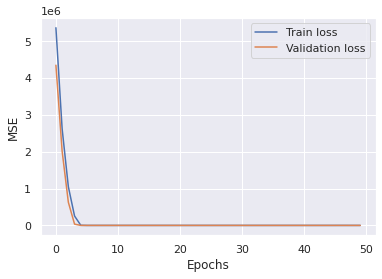

In [27]:
# plots 
fig = plt.figure()
plt.plot(lstm_vanilla_history.history['loss'], label='Train loss')
plt.plot(lstm_vanilla_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

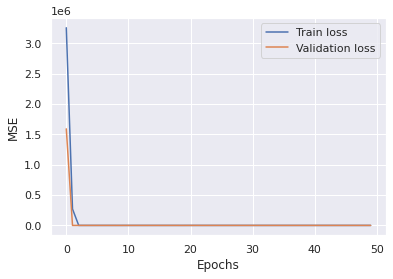

In [28]:
# plots 
fig = plt.figure()
plt.plot(lstm_stacked_history.history['loss'], label='Train loss')
plt.plot(lstm_stacked_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

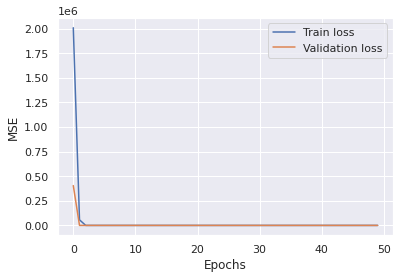

In [29]:
# plots 
fig = plt.figure()
plt.plot(lstm_bidirectional_history.history['loss'], label='Train loss')
plt.plot(lstm_bidirectional_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [30]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
lstm_vanilla_train_pred = model_lstm_vanilla.predict(X_train)
lstm_vanilla_test_pred = model_lstm_vanilla.predict(X_test)
print('Train rmse for vanilla:', np.sqrt(mean_squared_error(y_train, lstm_vanilla_train_pred)))
print('Test rmse for vanilla:', np.sqrt(mean_squared_error(y_test, lstm_vanilla_test_pred)))


lstm_stacked_train_pred = model_lstm_stacked.predict(X_train)
lstm_stacked_test_pred = model_lstm_stacked.predict(X_test)
print('Train rmse for stacked:', np.sqrt(mean_squared_error(y_train, lstm_stacked_train_pred)))
print('Test rmse for stacked:', np.sqrt(mean_squared_error(y_test, lstm_stacked_test_pred)))


lstm_bidirectional_train_pred = model_lstm_bidirectional.predict(X_train)
lstm_bidirectional_test_pred = model_lstm_bidirectional.predict(X_test)
print('Train rmse for bidirectional:', np.sqrt(mean_squared_error(y_train, lstm_bidirectional_train_pred)))
print('Test rmse for bidirectional:', np.sqrt(mean_squared_error(y_test, lstm_bidirectional_test_pred)))

Train rmse for vanilla: 9.052227413656059
Test rmse for vanilla: 11.675510253875386
Train rmse for stacked: 9.414216749356433
Test rmse for stacked: 12.180402303680385
Train rmse for bidirectional: 9.96727522985125
Test rmse for bidirectional: 12.839517846488425


In [31]:
print(y_test[0:10])
print(lstm_vanilla_test_pred[0:10])

[2515.   2516.   2513.6  2513.25 2517.55 2514.25 2515.   2511.35 2510.4
 2506.  ]
[[2495.1775]
 [2499.4587]
 [2502.2866]
 [2503.9478]
 [2505.5059]
 [2507.0603]
 [2508.02  ]
 [2508.3167]
 [2508.255 ]
 [2507.6792]]


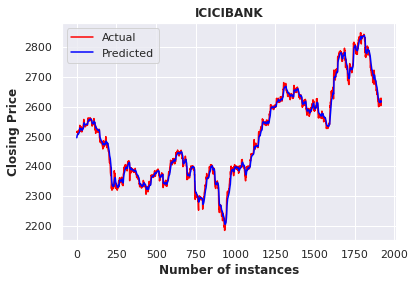

In [32]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold') 
plt.xlabel('Number of instances', fontweight='bold') 
# displaying the title
plt.title("ICICIBANK", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_vanilla_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

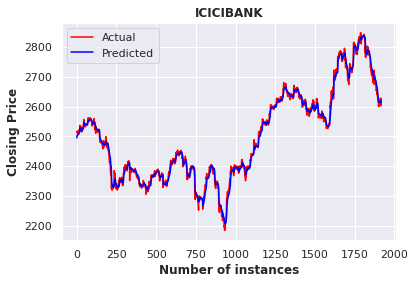

In [33]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold') 
plt.xlabel('Number of instances', fontweight='bold') 
# displaying the title
plt.title("ICICIBANK", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_stacked_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

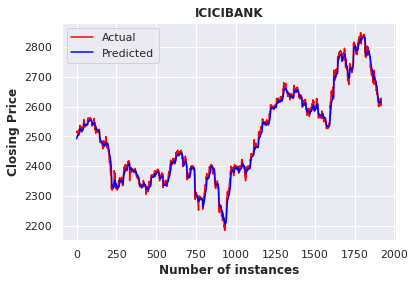

In [34]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold') 
plt.xlabel('Number of instances', fontweight='bold') 
# displaying the title
plt.title("ICICIBANK", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_bidirectional_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

In [35]:
# MAPE calculation
from sklearn.metrics import mean_absolute_percentage_error
print('Train MAPE for vanilla:', mean_absolute_percentage_error(y_train, lstm_vanilla_train_pred))
print('Test MAPE for vanilla:', mean_absolute_percentage_error(y_test, lstm_vanilla_test_pred))

print('Train MAPE stacked:', mean_absolute_percentage_error(y_train, lstm_stacked_train_pred))
print('Test MAPE stacked:', mean_absolute_percentage_error(y_test, lstm_stacked_test_pred))

print('Train MAPE bidirectional:', mean_absolute_percentage_error(y_train, lstm_bidirectional_train_pred))
print('Test MAPE bidirectional:', mean_absolute_percentage_error(y_test, lstm_bidirectional_test_pred))

Train MAPE for vanilla: 0.0027809911763518793
Test MAPE for vanilla: 0.0034054389655911433
Train MAPE stacked: 0.002890625384552439
Test MAPE stacked: 0.003561793881989596
Train MAPE bidirectional: 0.0031123268512381667
Test MAPE bidirectional: 0.003824609661244669


In [36]:
from sklearn.metrics import mean_absolute_error
print('Train MAE for vanilla:', mean_absolute_error(y_train, lstm_vanilla_train_pred))
print('Test MAE for vanilla:', mean_absolute_error(y_test, lstm_vanilla_test_pred))

print('Train MAE stacked:', mean_absolute_error(y_train, lstm_stacked_train_pred))
print('Test MAE stacked:', mean_absolute_error(y_test, lstm_stacked_test_pred))

print('Train MAE bidirectional:', mean_absolute_error(y_train, lstm_bidirectional_train_pred))
print('Test MAE bidirectional:', mean_absolute_error(y_test, lstm_bidirectional_test_pred))

Train MAE for vanilla: 6.424802199164614
Test MAE for vanilla: 8.483279142001756
Train MAE stacked: 6.682455478441408
Test MAE stacked: 8.87392728317257
Train MAE bidirectional: 7.1938835079242525
Test MAE bidirectional: 9.539123114474709
